In [1]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from glob import glob

In [2]:
ML_MODEL = False

path = "./dl_models/"

In [3]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

def plot_scatter_plot(y_hat, y_test, model_name, dataset_name, save_fig=False):
    
    if ML_MODEL:
        model_name += " Regression"
        
    if model_name == "BiDirectional LSTM":
        model_name = "Bi-Directional LSTM"
    
    if model_name == "LSTM AutoEncoder":
        model_name = "LSTM Auto-Encoder"
    
    rmse = np.sqrt(mean_squared_error(y_hat, y_test))
    mae = mean_absolute_error(y_hat, y_test)

    msg_rmse = f"RMSE: {rmse.round(3)}"
    msg_mae =  f"MAE:   {mae.round(3):.3f}"
#     msg_mean = f"MEAN: {y_test.mean().round(3)}"
  
    msg = msg_rmse + '\n' + msg_mae
    
    fig = plt.figure()
    ax = fig.gca()

    plt.scatter(y_test, y_hat, marker='.', c="k")
    
    if (dataset_name == "seoul"):
        x_lim = plt.xlim([0, 150])
        y_lim = plt.ylim([0, 150])
    elif (dataset_name == "ulaanbaatar"):
        x_lim = plt.xlim([0, 500])
        y_lim = plt.ylim([0, 500])    
    else:
        x_lim = plt.xlim([0, y_test.max()])
        y_lim = plt.ylim([0, y_test.max()])
    
    
    plt.plot(y_lim, y_lim, '--', color = 'r')
    plt.xlabel('Actual')
    plt.ylabel('Predictions')
    plt.title(f'{dataset_name.capitalize()}\n{model_name}')
    plt.grid(ls="--")
      
    ax.text(0.65, 0.15, msg,
             bbox=dict(facecolor='white', alpha=1),
             horizontalalignment='left',
             verticalalignment='center',
             fontsize=14,
             transform=ax.transAxes
             )
    
    if save_fig:
        plt.savefig(f"./paper_figures/{dataset_name}_{model_name}_scatter.png", dpi=300, bbox_inches='tight')
    
    plt.show()

In [4]:
def get_scatter_plots(dataset_name):
    
    model_directories = glob(path + f"{dataset_name}/*/")
    station_names = [file.split("/")[-1][:5] for file in glob(f"{path}/{dataset_name}/*.pkl")]
    
    for model_idx in range(len(model_directories)):

        y_test = np.array([])
        y_hat = np.array([])

        for station_idx in range(len(station_names)):
            pkl_file = model_directories[model_idx] + station_names[station_idx] + "_pm25.pkl"
            pkl_obj = pickle.load(open(pkl_file, "rb"))

            y_test = np.append(y_test, pkl_obj["test_set"].reshape(-1, 1))
            y_hat = np.append(y_hat, pkl_obj["test_set_predictions"].reshape(-1, 1))

        plot_scatter_plot(y_hat, y_test, model_directories[model_idx].split("/")[-2], dataset_name, save_fig=True)

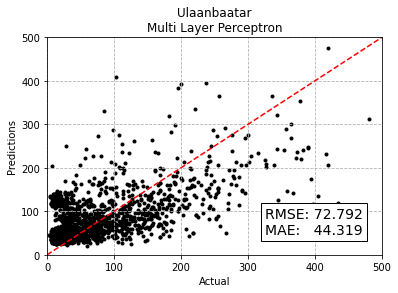

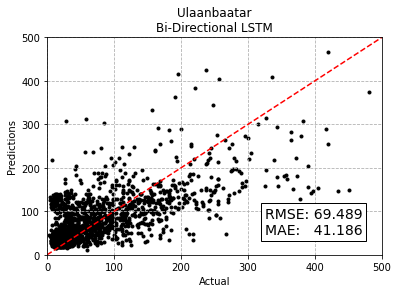

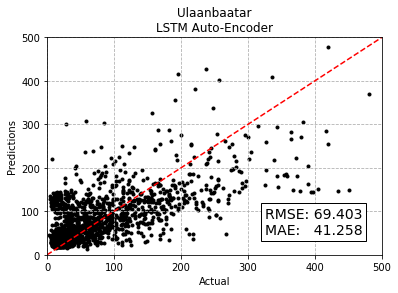

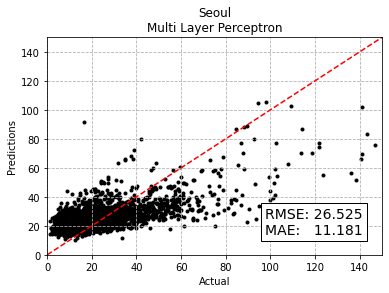

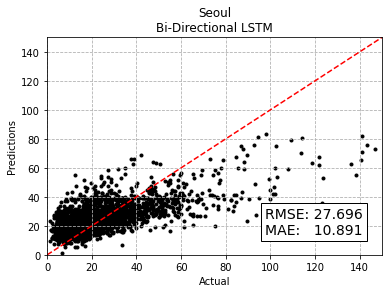

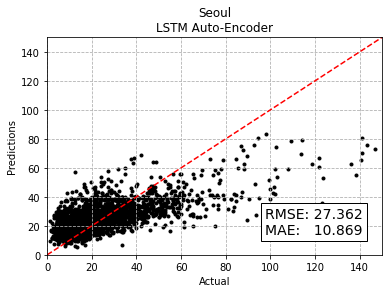

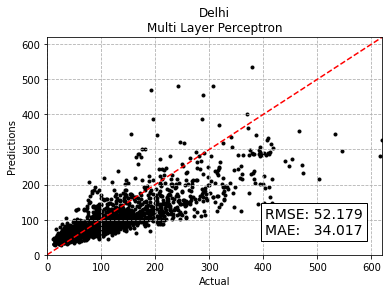

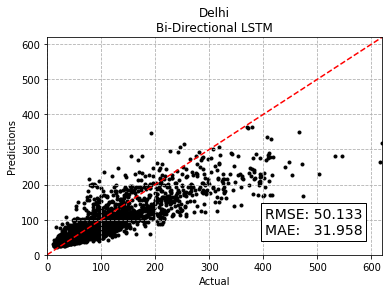

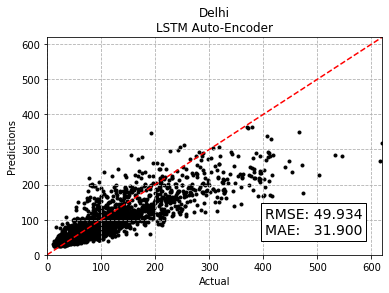

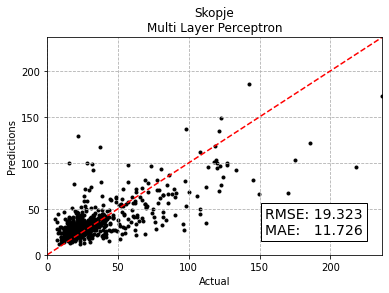

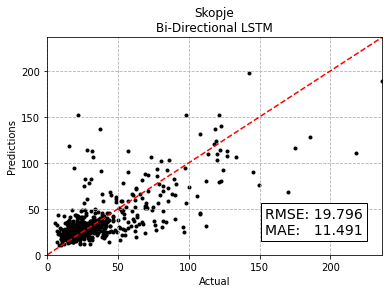

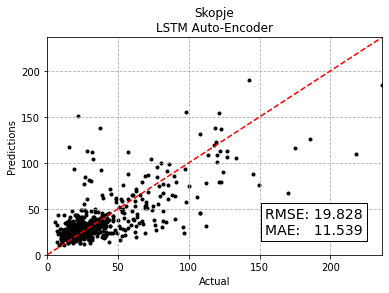

In [5]:
dataset_directories = glob(path + f"/*/")
for ds_dir in dataset_directories:
    dataset_name = ds_dir.split("/")[-2]
    get_scatter_plots(dataset_name)